# Clustering
machine learning yang digunakan untuk mengelompokkan data

### K-Means Clustering
kita akan gunakan algoritma K-Means Clustering untuk mempelajari teknik Clustering kali ini

### Case Study 1
case study pertama kita gunakan dummy data, data buatan sendiri, 2 dimensi, dengan pemisahan cluster yang jelas

### Case Study 2
kita akan gunakan data riil

In [26]:
# tambahan untuk prevent memory leak di windows
import os
os.environ["OMP_NUM_THREADS"] = "1"

# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


# untuk scaling data
from sklearn.preprocessing import StandardScaler

In [2]:
# Case Study 1
# kita buat data sendiri

# 1. import/ load data

# membuat 100 titik data berbeda dengan 2 fitur, 2 dimensi
X1 = -2 * np.random.rand(100,2)
X2 = 1 + 2 * np.random.rand(100,2)

X = np.concatenate([X1, X2])
print(X.shape)

(200, 2)


In [3]:
df_dummy = pd.DataFrame(X, columns=["fitur1", "fitur2"])
df_dummy

,fitur1,fitur2
0,-1.968668,-0.730193
1,-1.013016,-1.668539
2,-0.718546,-1.021003
3,-1.774183,-0.427363
4,-1.232214,-1.446990
...,...,...
195,1.047268,1.592716
196,1.668659,2.811972
197,1.212944,2.671876
198,2.131056,2.745358


200 titik data, dengan 100 di daerah -2, dan 100 di daerah 2 + 1

kita bisa buat visualisasi nya untuk melihat perbedaan 2 kelompok data yang kita gabungkan

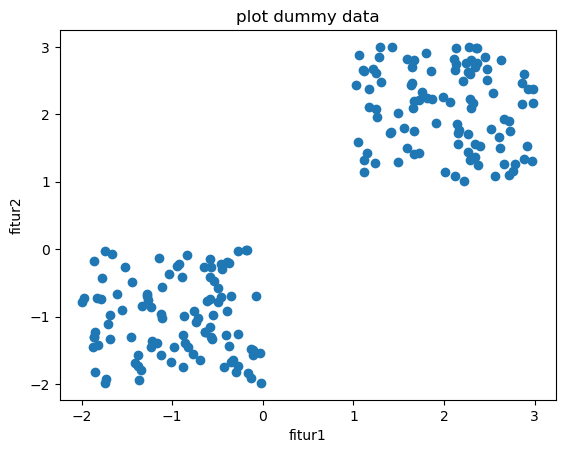

In [4]:
plt.scatter(df_dummy['fitur1'], df_dummy['fitur2'])
plt.title("plot dummy data")
plt.xlabel("fitur1")
plt.ylabel("fitur2")
plt.show()

In [5]:
# 2. data prep
# karena ini data dummy, tidak ada yg perlu dirapikan

In [6]:
# 3. membuat dan melatih model
model = KMeans()
model.fit(X)

KMeans()

In [7]:
# model sudah jadi, kita bisa lihat cluster center nya
model.cluster_centers_

array([[ 1.41604034,  1.65894101],
       [-0.54269962, -0.40804308],
       [ 2.41668631,  2.56988694],
       [-1.55300103, -1.53154754],
       [ 2.47526012,  1.46140582],
       [ 1.47539965,  2.59099973],
       [-0.50649014, -1.46419   ],
       [-1.51453362, -0.60967929]])

karena secara default model KMeans membuat 8 cluster, jadi ada 8 cluster center (8 centroid)

kita bisa visualisasikan 8 cluster ini di data kita

In [8]:
df_dummy_labeled = df_dummy.copy()

df_dummy_labeled["label"] = model.predict(df_dummy)
df_dummy_labeled

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,fitur1,fitur2,label
0,-1.968668,-0.730193,7
1,-1.013016,-1.668539,6
2,-0.718546,-1.021003,6
3,-1.774183,-0.427363,7
4,-1.232214,-1.446990,3
...,...,...,...
195,1.047268,1.592716,0
196,1.668659,2.811972,5
197,1.212944,2.671876,5
198,2.131056,2.745358,2


bisa dilihat setiap titik data kita sudah punya kelompok masing2

In [9]:
df_k_centers = pd.DataFrame(model.cluster_centers_, columns=['fitur1', 'fitur2'])
df_k_centers

,fitur1,fitur2
0,1.416040,1.658941
1,-0.542700,-0.408043
2,2.416686,2.569887
3,-1.553001,-1.531548
4,2.475260,1.461406
5,1.475400,2.591000
6,-0.506490,-1.464190
7,-1.514534,-0.609679


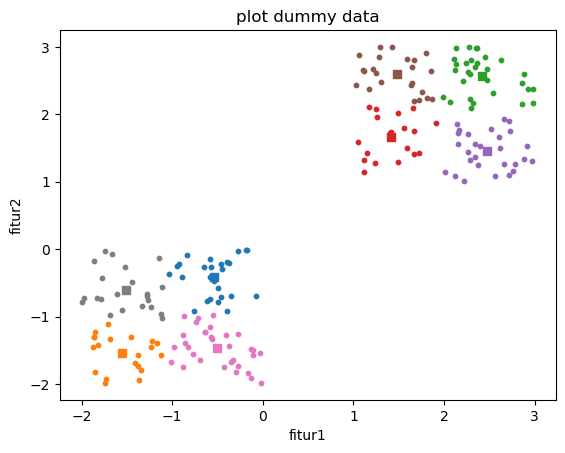

In [10]:
# membuat 8 warna untuk masing masing cluster
cdict = {
    0:'tab:red',
    1:'tab:blue',
    2:'tab:green',
    3:'tab:orange',
    4:'tab:purple',
    5:'tab:brown',
    6:'tab:pink',
    7:'tab:gray'
    }

fig, ax = plt.subplots()
for g in range(8):
    ix = df_dummy_labeled[df_dummy_labeled['label'] == g]
    ax.scatter(ix['fitur1'], ix['fitur2'], c=cdict[g], label=g, s=10)

    cx = df_k_centers.loc[g]
    ax.scatter(cx['fitur1'], cx['fitur2'], c=cdict[g], marker='s')


# plt.scatter(df_dummy['fitur1'], df_dummy['fitur2'])
# plt.scatter(df_k_centers['fitur1'], df_k_centers['fitur2'], marker='s')

plt.title("plot dummy data")
plt.xlabel("fitur1")
plt.ylabel("fitur2")
plt.show()

untuk data diatas, inertia nya adalah:

In [11]:
model.inertia_

30.07980757290477

kita bisa lihat kalau 8 kelompok agak kebanyakan untuk data ini

cara memilih jumlah k yang optimal adalah elbow method.

kita lihat perbandingan jumlah kelompok k dengan inertia (total jarak titik data ke centroid) dan kita cari titik sikunya, dimana penambahan jumlah k tidak merubah inertia secara signifikan lagi.

In [16]:
# misalkan kita cek inertia untuk k = 1 sampai k = 10
jumlah_k = range(1, 11)
inertias = []

for k in jumlah_k:
    model = KMeans(n_clusters=k)
    model.fit(df_dummy)

    inertias.append(model.inertia_)

inertias

[1056.0456785652777,
 131.50358822347772,
 103.5782570451896,
 78.55500209200353,
 62.022188473462094,
 46.83776794194706,
 38.21527379510267,
 30.06742922829535,
 26.715663215439662,
 24.317564467058812]

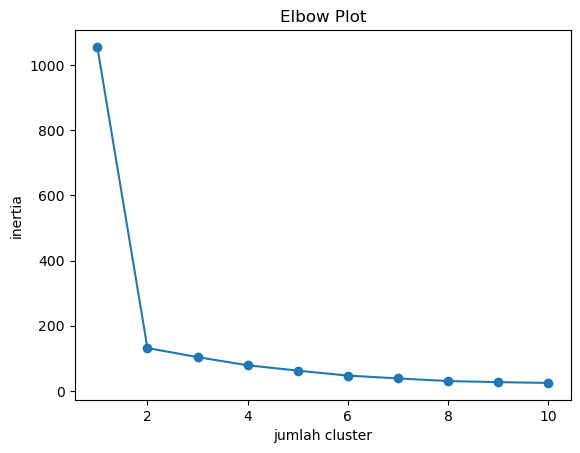

In [18]:
plt.plot(jumlah_k, inertias, marker='o')

plt.title("Elbow Plot")
plt.xlabel("jumlah cluster")
plt.ylabel("inertia")
plt.show()

"siku" atau "elbow" dari plot diatas ada di jumlah cluster = 2, atau mungkin 3, 4, dimana penambahan jumlah cluster tidak mengurangi inertia secara signifikan.

Jadi biasanya jumlah cluster yang optimal ada di sekitar sana.

Berikut kita bisa coba buat ulang model KMeans Clustering nya, dengan jumlah K berbeda, sekaligus melihat secara visual hasil cluster yang dibuat seperti apa

,fitur1,fitur2,label
0,-1.968668,-0.730193,2
1,-1.013016,-1.668539,2
2,-0.718546,-1.021003,0
3,-1.774183,-0.427363,2
4,-1.232214,-1.446990,2
...,...,...,...
195,1.047268,1.592716,1
196,1.668659,2.811972,3
197,1.212944,2.671876,3
198,2.131056,2.745358,3


,fitur1,fitur2
0,-0.505806,-0.970572
1,2.167448,1.524191
2,-1.508466,-1.071706
3,1.911121,2.555277


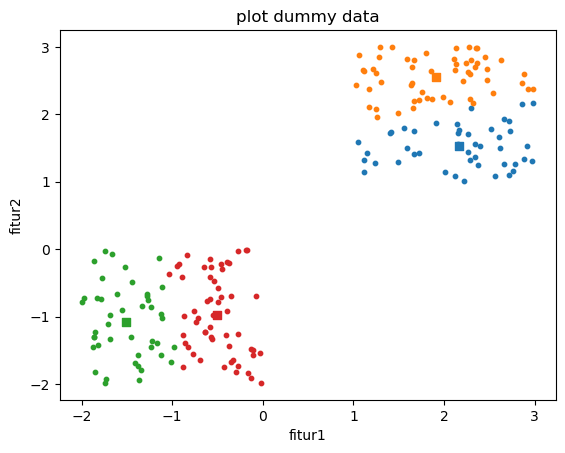

In [22]:
# membuat model Kmeans dengan jumlah cluster tertentu
k = 4
model = KMeans(n_clusters=k)
model.fit(df_dummy) # fit dengan data dummy kita

# membuat data dummy kita ditambah label sesuai hasil model KMeans
df_dummy_labeled = df_dummy.copy()
df_dummy_labeled["label"] = model.predict(df_dummy)
display(df_dummy_labeled)

# melihat centroid setiap cluster/label
df_k_centers = pd.DataFrame(model.cluster_centers_, columns=['fitur1', 'fitur2'])
display(df_k_centers)

# melihat secara visual - code dibawah max untuk 8 cluster karena ada 8 pilihan warna
# membuat 8 warna untuk masing masing cluster
cdict = {
    0:'tab:red',
    1:'tab:blue',
    2:'tab:green',
    3:'tab:orange',
    4:'tab:purple',
    5:'tab:brown',
    6:'tab:pink',
    7:'tab:gray'
    } # boleh tambahin warna lain untuk coba jumlah cluster lebih dari 8

fig, ax = plt.subplots()
for g in range(k):
    ix = df_dummy_labeled[df_dummy_labeled['label'] == g]
    ax.scatter(ix['fitur1'], ix['fitur2'], c=cdict[g], label=g, s=10)

    cx = df_k_centers.loc[g]
    ax.scatter(cx['fitur1'], cx['fitur2'], c=cdict[g], marker='s')

plt.title("plot dummy data")
plt.xlabel("fitur1")
plt.ylabel("fitur2")
plt.show()

# Case Study 2
mencoba clustering dengan data riil

kita akan gunakan data "Wholesale customers data.csv" yang diambil dari https://archive.ics.uci.edu/ml/datasets/wholesale+customers tentang customer customer yang membeli 6 jenis kategori barang berbeda dari region dan channel tertentu. Data ini menunjukkan total pembelian setiap customer dalam 1 tahun untuk setiap kategori item yang dijual.

Kita akan cluster data ini dan kita coba pahami kebiasaan setiap kelompok customer dalam membeli barang.

In [23]:
# 1. import data
df_wholesale = pd.read_csv('../dataset/Wholesale customers data.csv')
df_wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [24]:
df_wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


untuk clustering, kita akan pakai 6 fitur saja - Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen

Channel dan Region akan kita gunakan nanti bareng dengan cluster number (kelompok ke berapa) nya untuk mengkategorikan customer.

In [25]:
df_wholesale_data = df_wholesale.drop(columns=["Channel", "Region"])
df_wholesale_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [27]:
# 2. data preparation, exploration
# disini tambahannya, supaya clustering lebih akurat kita akan tambahkan scaling

scaler = StandardScaler()
df_wholesale_data_scaled = pd.DataFrame(scaler.fit_transform(df_wholesale_data), columns=df_wholesale_data.columns)
df_wholesale_data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


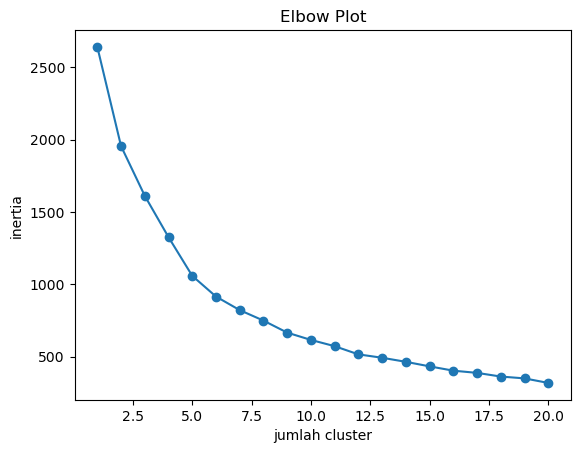

In [28]:
# --- tambahan: elbow method, untuk mencari jumlah cluster yang optimal
# misal kita mau coba jumlah k clusters 1 sampai 20

jumlah_k = range(1, 21)
inertias = []

for k in jumlah_k:
    model = KMeans(n_clusters=k)
    model.fit(df_wholesale_data_scaled)

    inertias.append(model.inertia_)

plt.plot(jumlah_k, inertias, marker='o')

plt.title("Elbow Plot")
plt.xlabel("jumlah cluster")
plt.ylabel("inertia")
plt.show()

misalkan dari elbow method diatas, kita menentukan k = 12

In [29]:
# 3. membuat dan melatih model
k = 12
model = KMeans(n_clusters=k)
model.fit(df_wholesale_data_scaled)

KMeans(n_clusters=12)

In [31]:
# gunakan model untuk mark data awal kita masing2 masuk kelompok mana
df_wholesale_labeled = df_wholesale.copy()

df_wholesale_labeled["label"] = model.predict(df_wholesale_data_scaled)

df_wholesale_labeled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,9
4,2,3,22615,5410,7198,3915,1777,5185,5
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,9
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


note: 

Channel, Region tidak digunakan saat clustering

label adalah hasil clustering

In [33]:
# untuk setiap cluster, kira2 kebiasaan belanjanya seperti apa

for n in range(k):
    print("Cluster ke " + str(n))
    display(df_wholesale_labeled[df_wholesale_labeled['label']==n].describe())

Cluster ke 0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0
mean,1.063953,2.500000,6158.360465,2403.779070,2992.866279,1837.767442,724.348837,766.081395,0.0
std,0.245384,0.812908,4177.916029,1967.118297,2072.920140,1717.312055,952.533670,757.150401,0.0
min,1.000000,1.000000,3.000000,55.000000,137.000000,47.000000,3.000000,3.000000,0.0
25%,1.000000,2.000000,2614.250000,988.000000,1517.750000,596.750000,177.500000,300.000000,0.0
50%,1.000000,3.000000,5943.500000,1914.000000,2296.500000,1212.000000,326.000000,541.000000,0.0
75%,1.000000,3.000000,9418.250000,3247.000000,3869.250000,2396.000000,829.000000,996.250000,0.0
max,2.000000,3.000000,16260.000000,10678.000000,10391.000000,7530.000000,4762.000000,4829.000000,0.0


Cluster ke 1


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,2.0,2.333333,5626.666667,16486.666667,26680.740741,1718.185185,13404.481481,2109.481481,1.0
std,0.0,0.877058,5240.997622,7113.758425,6940.144986,1575.744758,3933.465446,1865.315139,0.0
min,2.0,1.000000,85.000000,3737.000000,16767.000000,36.000000,7353.000000,37.000000,1.0
25%,2.0,1.500000,1839.000000,11403.000000,21912.500000,719.000000,10768.000000,720.500000,1.0
50%,2.0,3.000000,4484.000000,14881.000000,25957.000000,1234.000000,12591.000000,1423.000000,1.0
75%,2.0,3.000000,7666.000000,21728.000000,29582.000000,2186.000000,15155.000000,3003.500000,1.0
max,2.0,3.000000,22039.000000,29892.000000,45828.000000,6746.000000,24231.000000,6250.000000,1.0


Cluster ke 2


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000,20.0
mean,1.100000,2.700000,47283.850000,3159.550000,4434.300000,5332.350000,716.650000,1499.7500,2.0
std,0.307794,0.732695,10937.538188,1951.389909,3226.173472,4915.382796,631.635077,994.8346,0.0
min,1.000000,1.000000,36050.000000,286.000000,471.000000,532.000000,20.000000,3.0000,2.0
25%,1.000000,3.000000,39566.250000,1589.250000,1970.500000,1382.000000,211.500000,821.7500,2.0
50%,1.000000,3.000000,42937.000000,3313.500000,3689.500000,4648.500000,626.500000,1512.5000,2.0
75%,1.000000,3.000000,53924.250000,4076.500000,6677.500000,6658.500000,985.500000,2276.2500,2.0
max,2.000000,3.000000,76237.000000,7152.000000,12609.000000,18028.000000,2587.000000,3321.0000,2.0


Cluster ke 3


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
25%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
50%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
75%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
max,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0


Cluster ke 4


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.0
mean,1.806452,2.602151,5011.215054,8891.827957,12805.473118,1569.397849,5225.247312,1494.720430,4.0
std,0.397220,0.739268,4567.723431,4074.434769,4616.144489,1699.080513,2163.643222,1339.225266,0.0
min,1.000000,1.000000,18.000000,1275.000000,1660.000000,25.000000,241.000000,3.000000,4.0
25%,2.000000,3.000000,1420.000000,6208.000000,9785.000000,364.000000,3891.000000,555.000000,4.0
50%,2.000000,3.000000,3830.000000,7845.000000,11924.000000,959.000000,5121.000000,1328.000000,4.0
75%,2.000000,3.000000,7362.000000,10769.000000,15205.000000,2221.000000,6818.000000,1894.000000,4.0
max,2.000000,3.000000,21217.000000,23527.000000,28986.000000,10155.000000,10069.000000,7844.000000,4.0


Cluster ke 5


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0
mean,1.230769,2.512821,20990.987179,3885.294872,5366.051282,2055.871795,1198.307692,1670.076923,5.0
std,0.424052,0.785313,5504.312377,2964.275072,3693.157544,1444.488570,1300.621153,1388.892147,0.0
min,1.000000,1.000000,8708.000000,134.000000,3.000000,118.000000,3.000000,57.000000,5.0
25%,1.000000,2.000000,17201.750000,1437.000000,2406.000000,875.500000,245.250000,625.000000,5.0
50%,1.000000,3.000000,19897.500000,3401.500000,4567.500000,1996.500000,593.000000,1216.500000,5.0
75%,1.000000,3.000000,25134.500000,5377.250000,7545.750000,3034.000000,1887.750000,2548.000000,5.0
max,2.000000,3.000000,34454.000000,13252.000000,16966.000000,6130.000000,5058.000000,6854.000000,5.0


Cluster ke 6


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,2.0,2.666667,20208.000000,29848.666667,73225.333333,1470.333333,35210.000000,2058.666667,6.0
std,0.0,0.577350,14139.563041,21889.662682,17366.958321,1608.215263,7493.911996,865.252757,0.0
min,2.0,2.000000,8565.000000,4980.000000,59598.000000,131.000000,26701.000000,1215.000000,6.0
25%,2.0,2.500000,12341.000000,21674.500000,63448.000000,578.500000,32401.500000,1616.000000,6.0
50%,2.0,3.000000,16117.000000,38369.000000,67298.000000,1026.000000,38102.000000,2017.000000,6.0
75%,2.0,3.000000,26029.500000,42283.000000,80039.000000,2140.000000,39464.500000,2480.500000,6.0
max,2.0,3.000000,35942.000000,46197.000000,92780.000000,3254.000000,40827.000000,2944.000000,6.0


Cluster ke 7


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,7.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,7.0
25%,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,7.0
50%,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,7.0
75%,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,7.0
max,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0,7.0


Cluster ke 8


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,3.000000,3.0,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.0
mean,1.333333,3.0,29309.666667,14238.00000,17059.333333,5613.000000,3363.000000,15115.333333,8.0
std,0.577350,0.0,12743.358165,19304.48624,7759.679525,615.175585,1547.163857,1220.575411,0.0
min,1.000000,3.0,18291.000000,1266.00000,8117.000000,5154.000000,1579.000000,14351.000000,8.0
25%,1.000000,3.0,22332.000000,3145.50000,14579.500000,5263.500000,2876.000000,14411.500000,8.0
50%,1.000000,3.0,26373.000000,5025.00000,21042.000000,5373.000000,4173.000000,14472.000000,8.0
75%,1.500000,3.0,34819.000000,20724.00000,21530.500000,5842.500000,4255.000000,15497.500000,8.0
max,2.000000,3.0,43265.000000,36423.00000,22019.000000,6312.000000,4337.000000,16523.000000,8.0


Cluster ke 9


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,1.076923,2.641026,15956.333333,3800.128205,3968.692308,11077.871795,543.076923,1588.692308,9.0
std,0.269953,0.668351,8266.396540,3217.824970,2715.724176,5082.403126,482.946133,1208.174572,0.0
min,1.000000,1.000000,3.000000,333.000000,683.000000,6386.000000,15.000000,46.000000,9.0
25%,1.000000,2.500000,9878.000000,1753.000000,2266.500000,8182.500000,207.500000,766.500000,9.0
50%,1.000000,3.000000,16705.000000,2770.000000,3202.000000,9510.000000,386.000000,1384.000000,9.0
75%,1.000000,3.000000,21100.500000,5139.000000,5093.000000,12852.000000,739.500000,2170.500000,9.0
max,2.000000,3.000000,31276.000000,16687.000000,16027.000000,35009.000000,2381.000000,5864.000000,9.0


Cluster ke 10


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,2.0,2.0,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.0
mean,2.0,3.0,33695.500000,63878.500000,43842.500000,4384.500000,22120.50000,3684.000000,10.0
std,0.0,0.0,15231.787174,13604.027363,16586.603766,4804.790578,2899.84491,3932.927917,0.0
min,2.0,3.0,22925.000000,54259.000000,32114.000000,987.000000,20070.00000,903.000000,10.0
25%,2.0,3.0,28310.250000,59068.750000,37978.250000,2685.750000,21095.25000,2293.500000,10.0
50%,2.0,3.0,33695.500000,63878.500000,43842.500000,4384.500000,22120.50000,3684.000000,10.0
75%,2.0,3.0,39080.750000,68688.250000,49706.750000,6083.250000,23145.75000,5074.500000,10.0
max,2.0,3.0,44466.000000,73498.000000,55571.000000,7782.000000,24171.00000,6465.000000,10.0


Cluster ke 11


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0,11.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0,11.0
25%,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0,11.0
50%,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0,11.0
75%,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0,11.0
max,1.0,3.0,112151.0,29627.0,18148.0,16745.0,4948.0,8550.0,11.0


Cluster ke 0


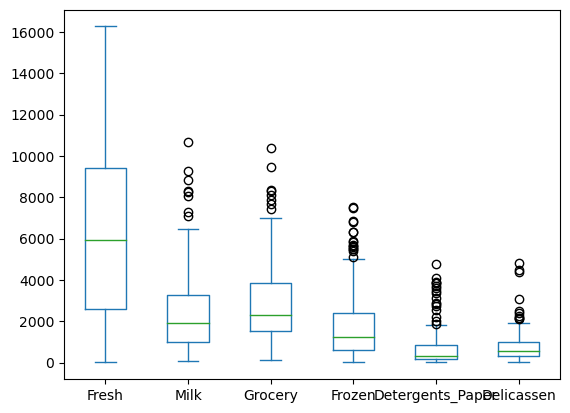

Cluster ke 1


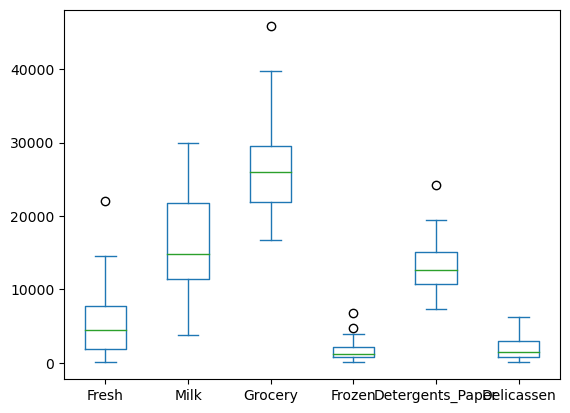

Cluster ke 2


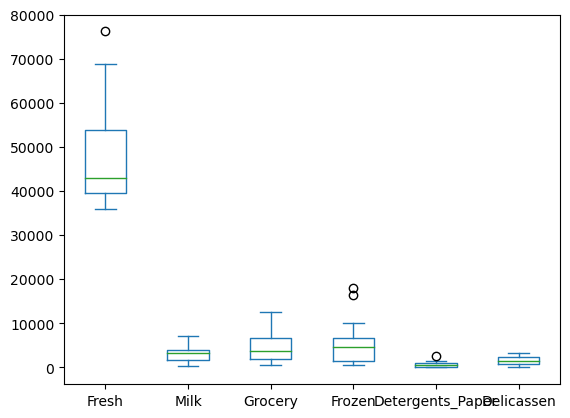

Cluster ke 3


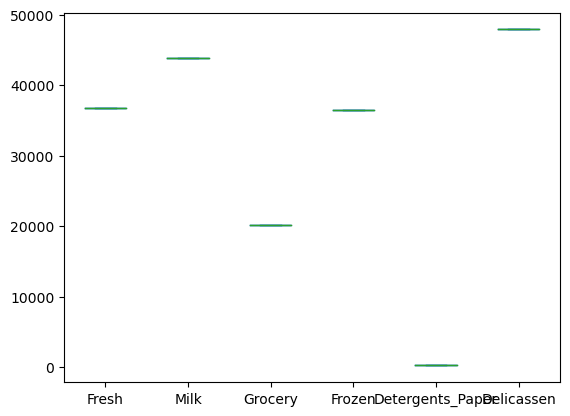

Cluster ke 4


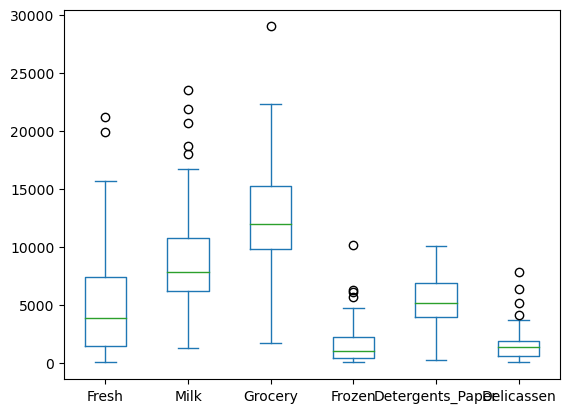

Cluster ke 5


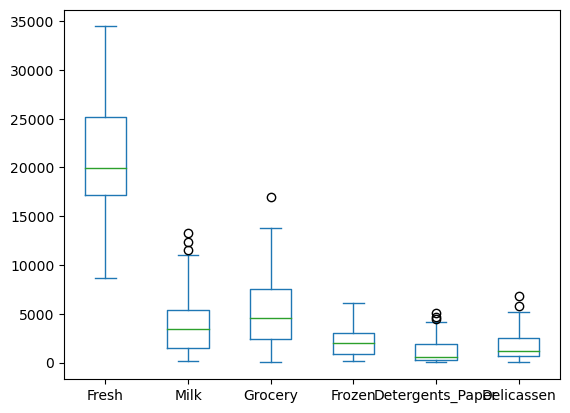

Cluster ke 6


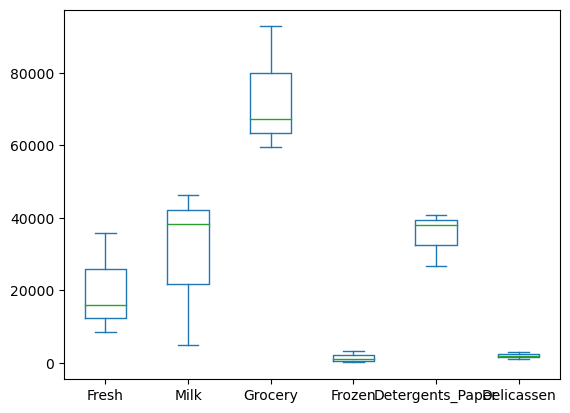

Cluster ke 7


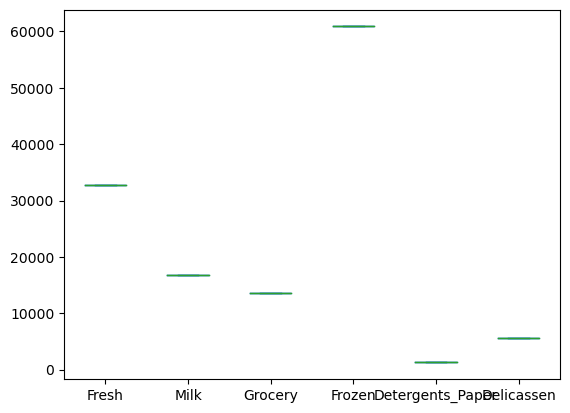

Cluster ke 8


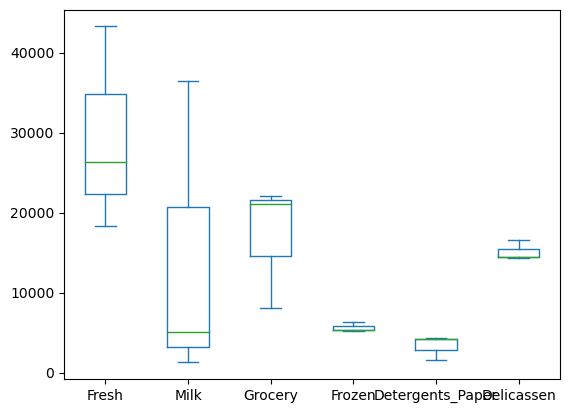

Cluster ke 9


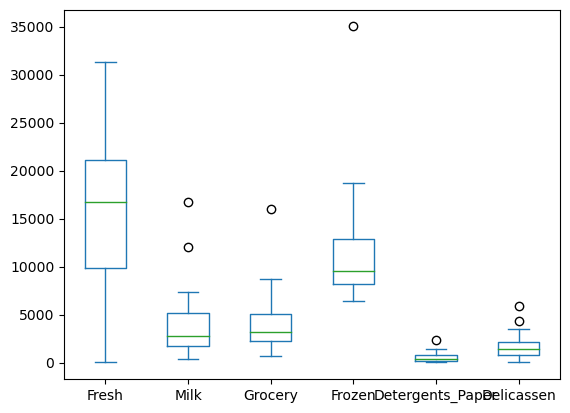

Cluster ke 10


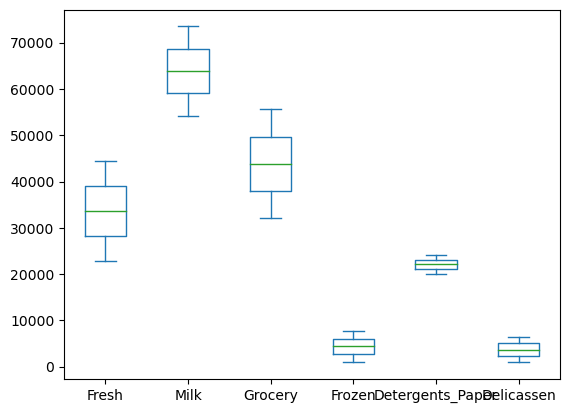

Cluster ke 11


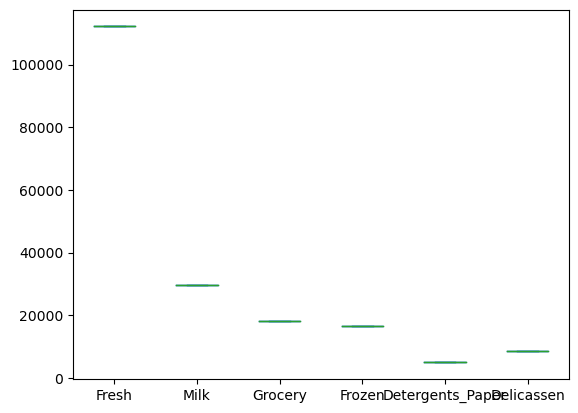

In [35]:
# coba pakai box plot


for n in range(k):
    print("Cluster ke " + str(n))
    data_cluster = df_wholesale_labeled[df_wholesale_labeled['label']==n]
    data_cluster = data_cluster.drop(columns=["Channel", "Region", "label"])
    data_cluster.plot(kind="box")
    plt.show()

perhatikan setiap cluster/ kelompok customer dan coba berikan insight kenapa mereka dikelompokkan seperti itu. Dari sana kita sebagai data analyst bisa memberi informasi tambahan ke datanya, data customer kita ini ada berapa kelompok customer yang kebiasaan belanja nya seperti apa.

# Extra: Save dan Load Model

model yang sudah kita buat bisa kita simpan seperti file

file ini bisa kita load dan pakai di tempat lain

kita akan gunakan bantuan package pickle untuk melakukan hal ini

In [36]:
# contoh: kita simpan model clustering yang barusan dibuat
import pickle

filename = 'clustering_model_wholesale.pkl'
pickle.dump(model, open(filename, 'wb'))